<a href="https://colab.research.google.com/github/Rohne-K/TMDL_group1_project/blob/main/week3_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have chosen to work on a datset regarding heart attack predictions in Indonesia. The dataset was obtained from Kaggle and spans 158355 observations. We have loaded the dataset and explored some summary statistics and correlations. Furthermore, missing values were handled and variables transformed to make working with the data easier.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/code turing')

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("heart_attack_prediction_indonesia.csv")
df

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158350,60,Female,Rural,Middle,0,0,199,0,79,0,...,74,79,52,238,234,Normal,0,1,0,0
158351,64,Female,Urban,Low,0,0,179,0,93,0,...,73,111,41,177,239,Normal,0,1,1,1
158352,30,Male,Urban,Middle,0,0,220,0,78,0,...,87,127,50,158,201,Abnormal,1,1,1,1
158353,74,Male,Urban,Middle,0,0,180,0,58,1,...,70,119,52,153,171,Normal,1,0,1,1


In [5]:
display(df.describe())
df.info()

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,0.299069,0.199804,199.533264,0.249901,93.268504,0.300218,6.480064,129.515772,79.490809,110.736762,49.491478,129.569916,149.715885,0.200575,0.499770,0.601029,0.401004
std,11.910897,0.457851,0.399854,39.737565,0.432957,16.382205,0.458354,1.425398,15.005641,10.002964,27.673445,9.982634,34.913318,49.023473,0.400432,0.500002,0.489688,0.490103
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,37.000000,70.000000,8.000000,-19.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.492985,119.000000,73.000000,89.000000,43.000000,106.000000,116.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.507461,130.000000,80.000000,109.000000,49.000000,130.000000,149.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,226.000000,0.000000,104.000000,1.000000,7.520640,140.000000,86.000000,130.000000,56.000000,153.000000,183.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,199.000000,127.000000,230.000000,93.000000,282.000000,380.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [6]:
# alcohol consumption of "None" is recognized as N/A so fill this back in
print(df['alcohol_consumption'].value_counts())

df = df.fillna("None")
df.info()

alcohol_consumption
Moderate    47725
High        15782
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 

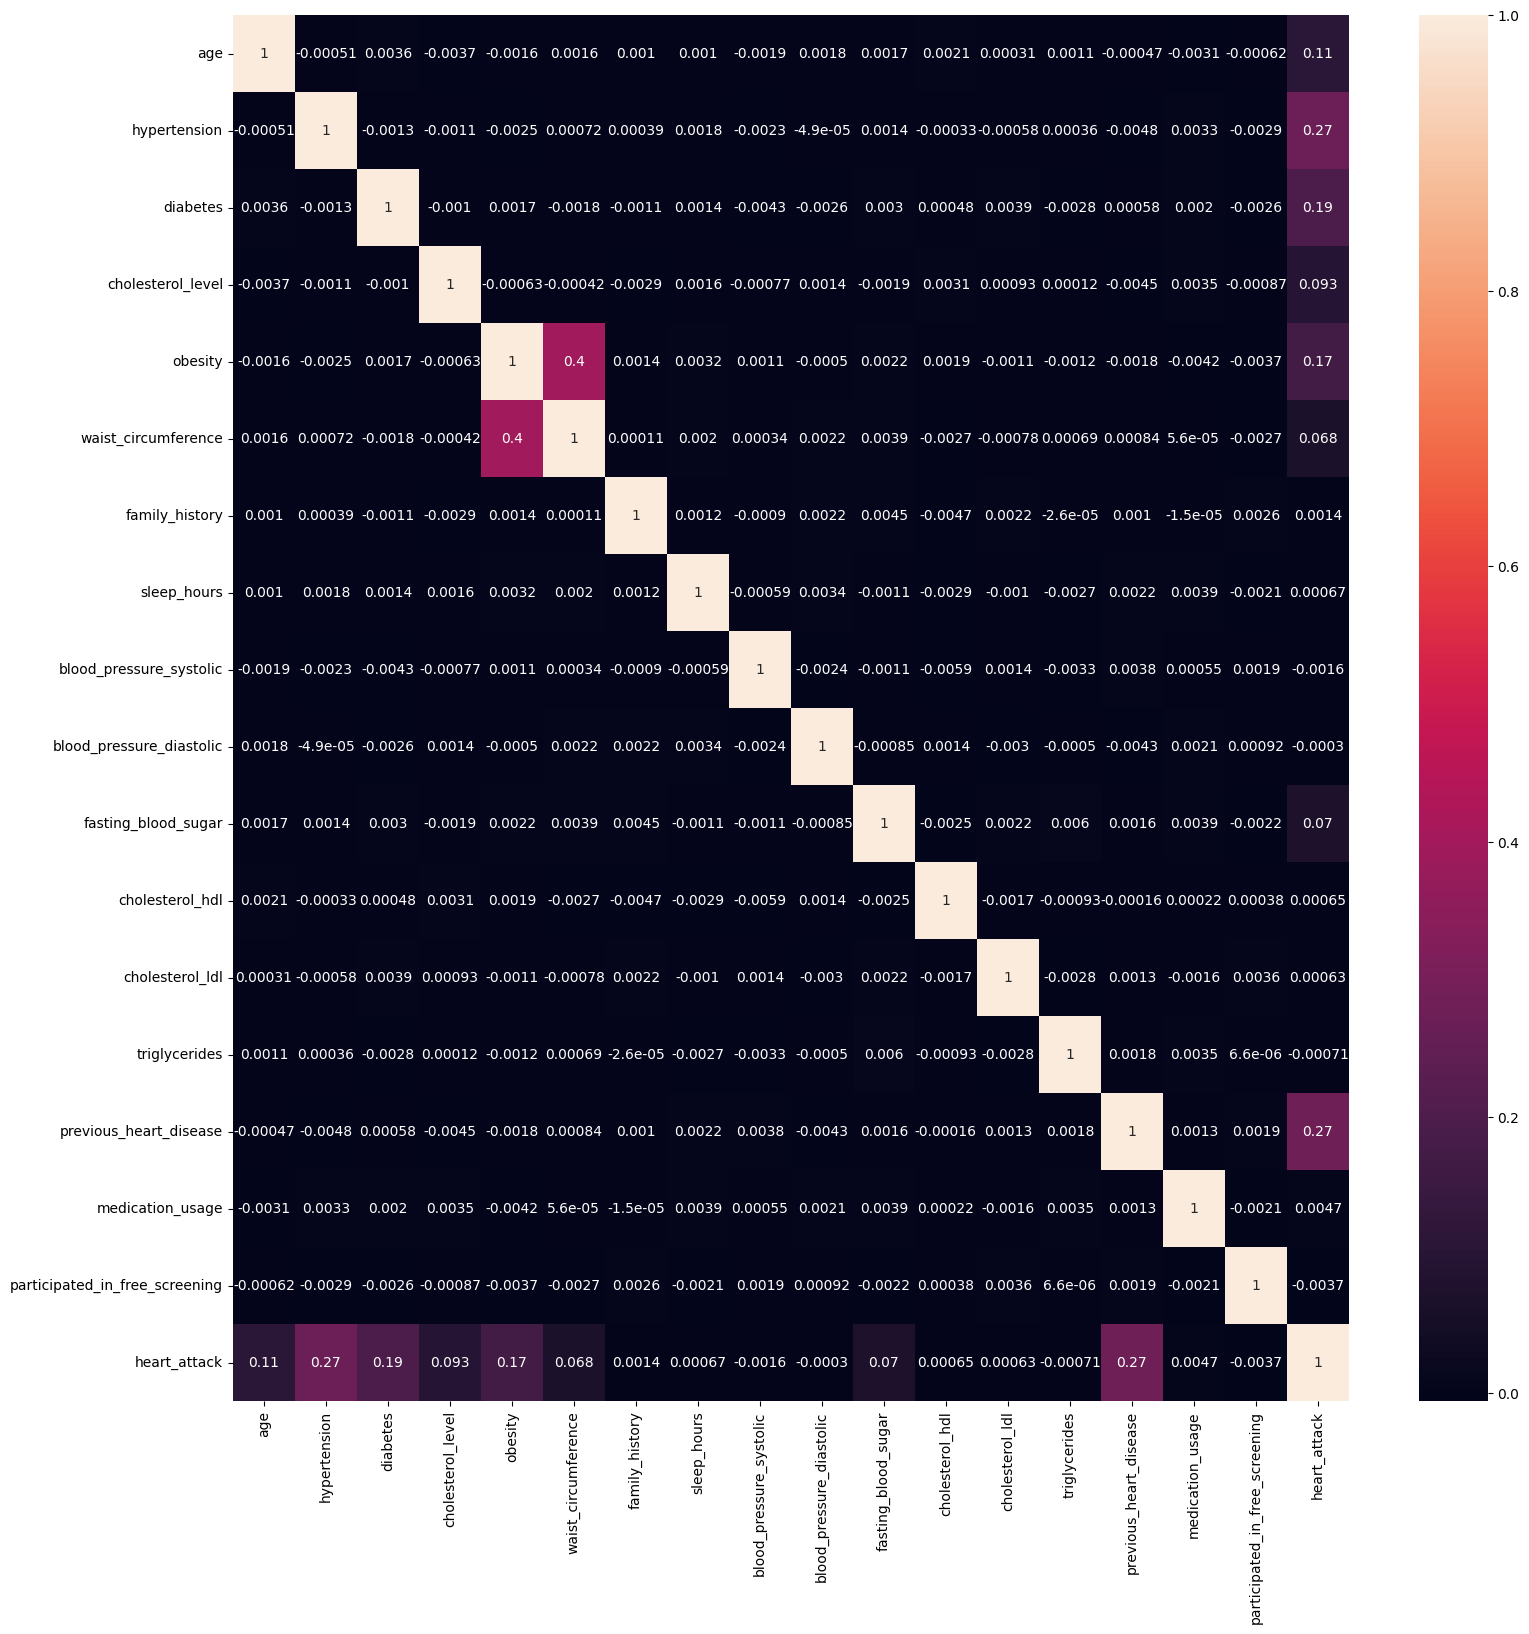

In [7]:
plt.figure(figsize = (18, 18))
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

(array([94854.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 63501.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

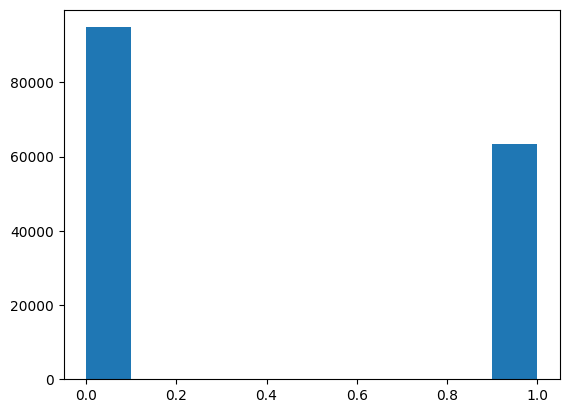

In [8]:
plt.hist(df['heart_attack'])

In [9]:
for col in df.select_dtypes(exclude=['number']).columns:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 30)

Value counts for 'gender':
gender
Male      82243
Female    76112
Name: count, dtype: int64
------------------------------
Value counts for 'region':
region
Urban    103038
Rural     55317
Name: count, dtype: int64
------------------------------
Value counts for 'income_level':
income_level
Middle    71230
Low       63422
High      23703
Name: count, dtype: int64
------------------------------
Value counts for 'smoking_status':
smoking_status
Never      79183
Current    39771
Past       39401
Name: count, dtype: int64
------------------------------
Value counts for 'alcohol_consumption':
alcohol_consumption
None        94848
Moderate    47725
High        15782
Name: count, dtype: int64
------------------------------
Value counts for 'physical_activity':
physical_activity
Low         63417
Moderate    63027
High        31911
Name: count, dtype: int64
------------------------------
Value counts for 'dietary_habits':
dietary_habits
Unhealthy    95030
Healthy      63325
Name: count, dtype:

In [10]:
# transform non-numerical variables into simple numerical ones
never_past_current = {'Never': 0, 'Past': 1, 'Current': 2}
none_moderate_high = {'None': 0, 'Moderate': 1, 'High': 2}
low_middle_high = {'Low': 1, 'Middle': 2, 'High': 3}
low_moderate_high = {'Low': 1, 'Moderate': 2, 'High': 3}

df['income_level_transformed'] = df['income_level'].map(low_middle_high)
df['alcohol_consumption_transformed'] = df['alcohol_consumption'].map(none_moderate_high)
df['smoking_status_transformed'] = df['smoking_status'].map(never_past_current)
df['physical_activity_transformed'] = df['physical_activity'].map(low_moderate_high)
df['air_pollution_exposure_transformed'] = df['air_pollution_exposure'].map(low_moderate_high)
df['stress_level_transformed'] = df['stress_level'].map(low_moderate_high)

display(df.describe())

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,...,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack,income_level_transformed,alcohol_consumption_transformed,smoking_status_transformed,physical_activity_transformed,air_pollution_exposure_transformed,stress_level_transformed
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,...,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,0.299069,0.199804,199.533264,0.249901,93.268504,0.300218,6.480064,129.515772,79.490809,...,0.200575,0.499770,0.601029,0.401004,1.749177,0.500704,0.751116,1.801042,1.902125,2.099327
std,11.910897,0.457851,0.399854,39.737565,0.432957,16.382205,0.458354,1.425398,15.005641,10.002964,...,0.400432,0.500002,0.489688,0.490103,0.698054,0.670318,0.830209,0.749939,0.700454,0.699247
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.492985,119.000000,73.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.507461,130.000000,80.000000,...,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
75%,63.000000,1.000000,0.000000,226.000000,0.000000,104.000000,1.000000,7.520640,140.000000,86.000000,...,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,199.000000,127.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000


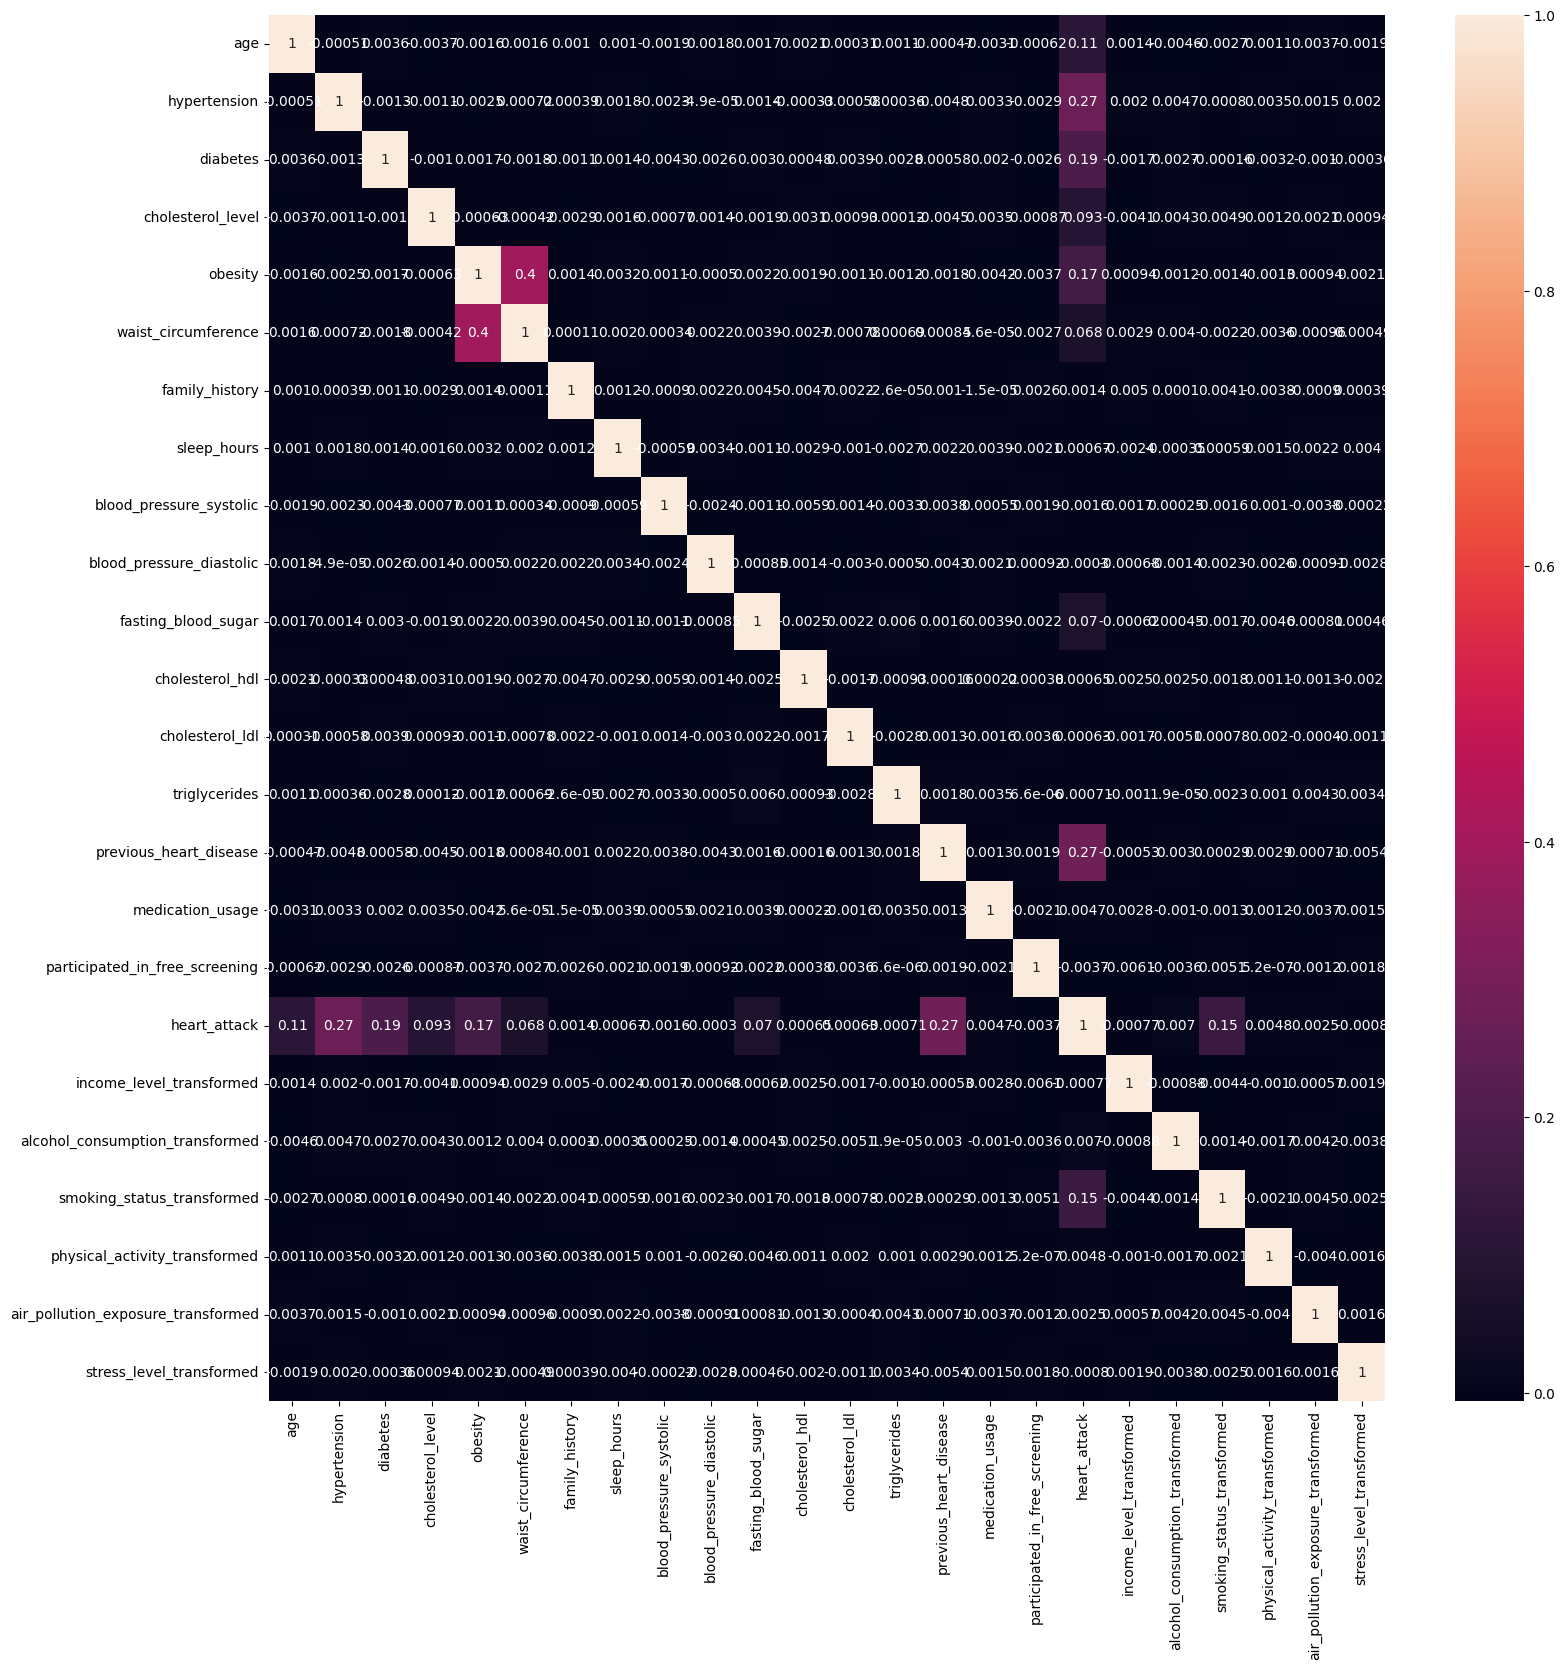

In [11]:
plt.figure(figsize = (18, 18))
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

In [12]:
df.to_csv("heart_attack_prediction_indonesia_transformed.csv", index = False)

Logistic Regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select features (excluding redundant or transformed columns)
categorical_features = ["gender", "region", "smoking_status", "alcohol_consumption",
                        "physical_activity", "air_pollution_exposure", "stress_level"]

numerical_features = ["age", "hypertension", "diabetes", "cholesterol_level", "obesity",
                      "waist_circumference", "family_history", "sleep_hours",
                      "blood_pressure_systolic", "blood_pressure_diastolic",
                      "fasting_blood_sugar", "cholesterol_hdl", "cholesterol_ldl",
                      "triglycerides", "previous_heart_disease", "medication_usage",
                      "participated_in_free_screening"]

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop="first") # Set sparse=False
encoded_cats = encoder.fit_transform(df[categorical_features])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))

# Standardize numerical features
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(df[numerical_features])
scaled_nums_df = pd.DataFrame(scaled_nums, columns=numerical_features)

# Combine processed features
X = pd.concat([scaled_nums_df, encoded_cats_df], axis=1)
y = df["heart_attack"].astype(int)  # Ensure target variable is integer

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("The accuracy is: ", accuracy, "\n")
print(report)


The accuracy is:  0.7304474124593476 

              precision    recall  f1-score   support

           0       0.75      0.83      0.79     18906
           1       0.70      0.59      0.64     12765

    accuracy                           0.73     31671
   macro avg       0.72      0.71      0.71     31671
weighted avg       0.73      0.73      0.73     31671



In [35]:
# I changed this code to the above code, it gave me an error
# (and changed the print statements so its easier to read)

# One-hot encode categorical variables
#encoder = OneHotEncoder(drop="first")
#encoded_cats = encoder.fit_transform(df[categorical_features])
#encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))

Tree and Random Forest - no hyperparameter optimalization

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Separate target variables from features
y = df['heart_attack']  # Target variable
X = df.drop(columns=['heart_attack'])  # Features

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate models
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Decision Tree Accuracy: 0.6572890025575447
Random Forest Accuracy: 0.7344889646679928

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71     18906
           1       0.57      0.58      0.58     12765

    accuracy                           0.66     31671
   macro avg       0.64      0.64      0.64     31671
weighted avg       0.66      0.66      0.66     31671


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79     18906
           1       0.70      0.61      0.65     12765

    accuracy                           0.73     31671
   macro avg       0.73      0.71      0.72     31671
weighted avg       0.73      0.73      0.73     31671



Decision Tree hyperparameter

Next week we should split the data into test, training and validation for the hyperparameter optimisation.

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Perform randomized search
random_search = RandomizedSearchCV(dt, param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best model
best_dt_model = random_search.best_estimator_


Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 11}


In [38]:
# Make predictions with the best model
dt_best_predictions = best_dt_model.predict(X_test)

# Evaluate the best model
print("Best Decision Tree Accuracy:", accuracy_score(y_test, dt_best_predictions))
print("\nBest Decision Tree Classification Report:\n", classification_report(y_test, dt_best_predictions))

Best Decision Tree Accuracy: 0.7368570616652458

Best Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79     18906
           1       0.70      0.61      0.65     12765

    accuracy                           0.74     31671
   macro avg       0.73      0.72      0.72     31671
weighted avg       0.73      0.74      0.73     31671

